# Apprentissage supervisé : premiers pas 

Le but de cette parti est de vous faire manipuler les arbres de décision, les méthodes d'ensemble ainsi que la regression logistique avec Scikit-learn.

N'hésitez pas à regarder les docs :
1. [Documentation NumPy](https://docs.scipy.org/doc/numpy/user/index.html)
2. [Documentation SciPy](https://docs.scipy.org/doc/scipy/reference/)
3. [Documentation MatPlotLib](http://matplotlib.org/)
4. [Site scikit-learn](http://scikit-learn.org/stable/index.html)
5. [Site langage python](https://www.python.org/)


In [ ]:
!wget http://www.lamsade.dauphine.fr/~ychevaleyre/plot_unveil_tree_structure.py
!wget http://www.lamsade.dauphine.fr/~ychevaleyre/visualize_classifier.py
# scikit-learn, matplotlib et numpy
%matplotlib inline
from sklearn import tree,ensemble,datasets
import numpy as np 
import matplotlib.pyplot as plt

# code pour voir la structure de l'arbre
from plot_unveil_tree_structure import show_tree_structure
from visualize_classifier import visualize_classifier,visualize_tree

--2020-10-06 07:50:52--  http://www.lamsade.dauphine.fr/~ychevaleyre/plot_unveil_tree_structure.py
Resolving www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)... 193.48.71.250
Connecting to www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)|193.48.71.250|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.lamsade.dauphine.fr/~ychevaleyre/plot_unveil_tree_structure.py [following]
--2020-10-06 07:50:53--  https://www.lamsade.dauphine.fr/~ychevaleyre/plot_unveil_tree_structure.py
Connecting to www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)|193.48.71.250|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5201 (5.1K) [text/x-python]
Saving to: ‘plot_unveil_tree_structure.py’

plot_unveil_tree_st 100%[===================>]   5.08K  --.-KB/s    in 0s      

2020-10-06 07:50:53 (151 MB/s) - ‘plot_unveil_tree_structure.py’ saved [5201/5201]

--2020-10-06 07:50:53--  http://www.lamsade.dauphine.fr/~ychevaleyre/visualize_classifier.py

## Arbre de decision pour la Regression

Créeons un tableau de donnees 1D, avec une variable X allant de 1 à 200, et une variable y étant le log de x, avec en plus du bruit gaussien

In [ ]:
N = 200

X = np.arange(1,N+1)
Y = np.log(X)
Y += 0.5*np.random.normal(size=N)

**Exercice**

    Affichez X et les dimensions de X
    Affichez ce nuage de points, par dessus la courbe log suivante:

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
(200,)


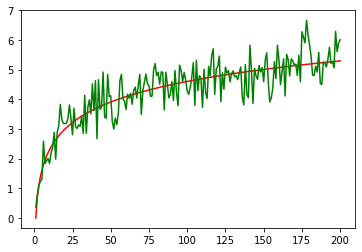

In [ ]:
print(X)
print(X.shape)
plt.plot(X,np.log(X),color='red')
plt.plot(X,Y,color='green')


On veut trouver l'arbre de décision qui "fit" le mieux ces données
Pour ce faire, il faut que X n'ait pas la forme d'un vecteur mais d'une matrice avec une seule colonne (c'est ce que scikit-learn s'attend a trouver)

**Exercice:**

Transformez X en matrice (ce qui donnera une matrice composée d'une seule colonne). Pour cela, utilisez `np.reshape`


In [ ]:
print(X.shape)
# A remplir 
X = np.reshape(X,(X.shape[0],1))
print(X.shape)

(200,)
(200, 1)


Maintenant, lancons l'algorithme d'arbre de decision (en régression). Aidez vous de la documentation Scikit-Learn pour trouver et comprendre comment creer cet algorithme.

In [ ]:
#A completer
clf = tree.DecisionTreeRegressor()

clf.fit(X,Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Affichons l'arbre de decision

In [ ]:
show_tree_structure(clf)

 

The binary tree structure has 399 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 55.5 else to node 110.
	node=1 test node: go to node 2 if X[:, 0] <= 14.5 else to node 29.
		node=2 test node: go to node 3 if X[:, 0] <= 5.5 else to node 12.
			node=3 test node: go to node 4 if X[:, 0] <= 2.5 else to node 7.
				node=4 test node: go to node 5 if X[:, 0] <= 1.5 else to node 6.
					node=5 leaf node. Prediction=0.3648373922208004
					node=6 leaf node. Prediction=0.7833704579642122
				node=7 test node: go to node 8 if X[:, 0] <= 3.5 else to node 9.
					node=8 leaf node. Prediction=1.0903477246589295
					node=9 test node: go to node 10 if X[:, 0] <= 4.5 else to node 11.
						node=10 leaf node. Prediction=1.2361150739414168
						node=11 leaf node. Prediction=1.2982103128601865
			node=12 test node: go to node 13 if X[:, 0] <= 11.5 else to node 24.
				node=13 test node: go to node 14 if X[:, 0] <= 6.5 else to node 15.
					node=14 leaf node. Pre

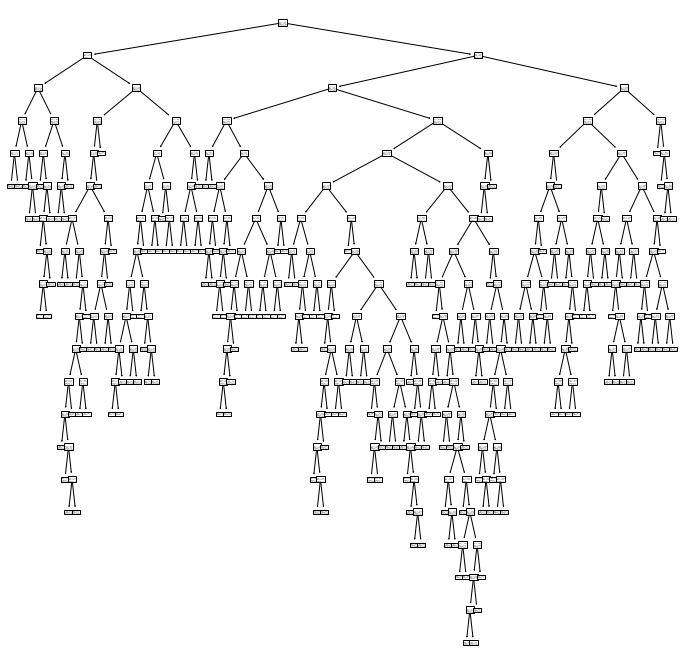

In [ ]:
#approche schématique et non textuelle de l'arbre
fig, ax = plt.subplots(figsize=(12, 12))  
tree.plot_tree(clf,ax=ax)
plt.show()

** exercice **
    
* Changez les parametres de creation de l'arbre pour que l'arbre n'ait pas plus de 10 feuilles. 
* Une fois  ces paramètres trouvés, dessinez l'arbre de décision obtenu sur votre feuille.

In [ ]:
#A completer
clf = tree.DecisionTreeRegressor(max_leaf_nodes=10)
clf.fit(X,Y)
show_tree_structure(clf)


The binary tree structure has 19 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 55.5 else to node 2.
	node=1 test node: go to node 3 if X[:, 0] <= 14.5 else to node 4.
	node=2 test node: go to node 5 if X[:, 0] <= 156.5 else to node 6.
		node=3 test node: go to node 7 if X[:, 0] <= 5.5 else to node 8.
		node=4 test node: go to node 11 if X[:, 0] <= 34.5 else to node 12.
		node=5 test node: go to node 9 if X[:, 0] <= 77.5 else to node 10.
		node=6 test node: go to node 15 if X[:, 0] <= 196.5 else to node 16.
			node=7 leaf node. Prediction=0.9545761923291091
			node=8 leaf node. Prediction=2.1812843785666036
			node=9 leaf node. Prediction=4.266022108479519
			node=10 leaf node. Prediction=4.68148571820904
			node=11 leaf node. Prediction=3.267025668179751
			node=12 test node: go to node 13 if X[:, 0] <= 50.5 else to node 14.
				node=13 leaf node. Prediction=3.9661814168155716
				node=14 leaf node. Prediction=3.265447202286718
			node=15 test

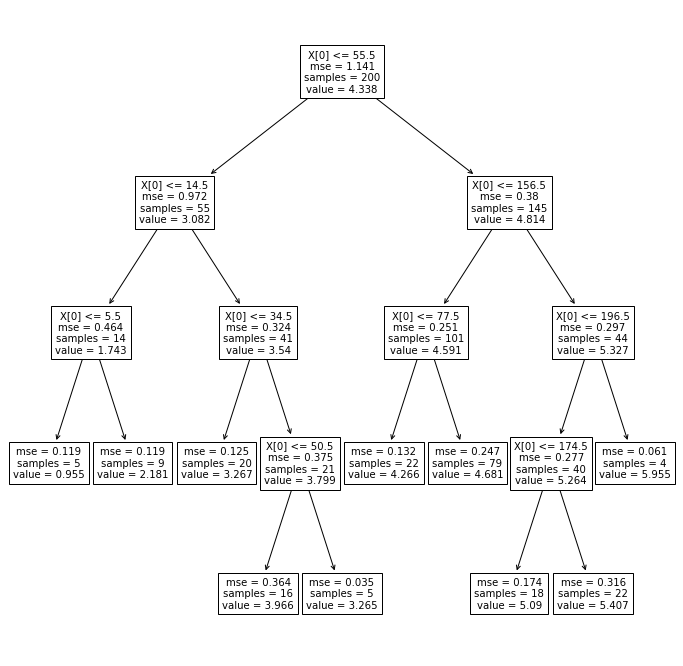

In [ ]:
#approche schématique et non textuelle de l'arbre
fig, ax = plt.subplots(figsize=(12, 12))  
tree.plot_tree(clf,ax=ax)
plt.show()

scikit-learn possède une fonction *predict* qui s'applique entre autres aux arbres de décision

Affichez l'aide de cette fonction en tapant *clf.predict?*

Montrez la valeur renvoyez en x=1, x=4 et x=7. Que remarquez-vous ?

In [ ]:
#A completer
clf.predict([[1]])


array([0.95457619])

In [ ]:
clf.predict([[4]])


array([0.95457619])

In [ ]:
clf.predict([[7]])

array([2.18128438])

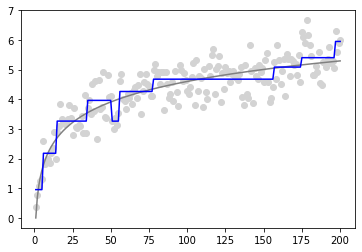

In [ ]:
Z = clf.predict(X)

plt.scatter(X,Y,color='lightgrey')
plt.plot(X,np.log(X),color='gray')
plt.plot(X,Z,color='blue')

**Exercice:**
* Faites varier les paramètres de l'arbre de décision pour qu'il soit plus ou moins précis, et affichez le.
* Lancez l'apprentissage de forets aléatoires sur le même jeu de données ( http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html ). Faites varier les paramètres. Que constatez-vous ?

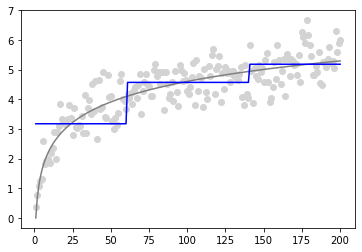

In [ ]:
#Random Forest

#A completer
clf = tree.DecisionTreeRegressor(random_state=0,max_leaf_nodes=80,min_impurity_decrease=0.0,min_weight_fraction_leaf=0.3)
clf.fit(X,Y)

Z = clf.predict(X)

plt.scatter(X,Y,color='lightgrey')
plt.plot(X,np.log(X),color='gray')
plt.plot(X,Z,color='blue')

### Arbres de Décision en classification du jeu de données IRIS

In [ ]:
X,y = datasets.load_iris(True)
print(X.shape[1])

4


**Exercice**

* Supprimez les deux dernieres colonnes de X (maintenant, X n'a plus que 2 colonnes)
* Affichez sous forme de nuage de points ces données, en prenant soin d'utiliser différentes couleurs pour différentes classes


In [ ]:
X=np.delete(X, slice(2,4), axis=1) 
#suppression des colonnes 2 et 3 avec axis=1 (attention l'indice en python commence à 0)  
print(X.shape)
print(X)

(150, 2)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 

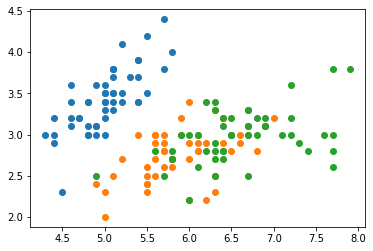

In [ ]:
plt.plot(X[y==0,0],X[y==0,1],'o',color="C0")
plt.plot(X[y==1,0],X[y==1,1],'o',color="C1")
plt.plot(X[y==2,0],X[y==2,1],'o',color="C2")


**Exercice**
* Trouvez et lancez l'algorithme d'apprentissage d'arbres de décision `DecisionTreeClassifier` sur ces données, en imposant d'avoir 10 feuilles maximum
    (attention, on est en classification, plus en régression).
* Affichez la structure de l'arbre avec `show_tree_structure`
* lancer le programme `visualize_tree(dt,X,y,xlim=(4,8),ylim=(2,4))`
* Comparez les deux
    
    

In [ ]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=5, max_leaf_nodes = 10)
clf.fit(X,y)
show_tree_structure(clf)



The binary tree structure has 19 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 5.450000047683716 else to node 2.
	node=1 test node: go to node 5 if X[:, 1] <= 2.8000000715255737 else to node 6.
	node=2 test node: go to node 3 if X[:, 0] <= 6.1499998569488525 else to node 4.
		node=3 test node: go to node 7 if X[:, 1] <= 3.450000047683716 else to node 8.
		node=4 test node: go to node 9 if X[:, 0] <= 7.049999952316284 else to node 10.
		node=5 leaf node. Prediction=[1. 5. 1.]
		node=6 leaf node. Prediction=[44.  1.  0.]
			node=7 test node: go to node 11 if X[:, 0] <= 5.75 else to node 12.
			node=8 leaf node. Prediction=[5. 0. 0.]
			node=9 test node: go to node 13 if X[:, 1] <= 3.25 else to node 14.
			node=10 leaf node. Prediction=[ 0.  0. 12.]
				node=11 leaf node. Prediction=[ 0. 15.  2.]
				node=12 leaf node. Prediction=[ 0. 13.  8.]
				node=13 test node: go to node 15 if X[:, 0] <= 6.549999952316284 else to node 16.
				node=14 leaf n

/content/visualize_classifier.py:63: UserWarning: The following kwargs were not used by contour: 'clim'
  zorder=1)


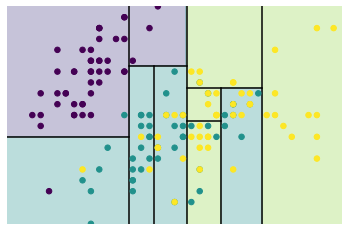

In [ ]:
visualize_tree(clf,X,y,xlim=(4,8),ylim=(2,4))

**Exercice**

* Affichez la prédiction de l'arbre sur la première ligne de données.
* Calculez le taux d'erreur de l'arbre

**Exercice**

Appliquez maintenant des forets aleatoires sur ces donnees, et visualisez le resultat


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = ensemble.RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
Z=clf.predict(X)
iterat=0


**Exercice**

Pour evaluer plus finement la qualite des arbres obtenus, on va diviser le jeu de donnees en deux: une moitie pour l'apprentissage, et une moitie pour le test. (utilisez la fonction train_test_split de scikit learn, cf doc)
* Lancez l'algorithme d'apprentissage avec les donnees d'apprentissage, et calculez l'erreur de classification sur le test.
* Faites le en faisant varier le parametre 'nombre de feuilles max' de l'arbre. Que constatez-vous ?


/content/visualize_classifier.py:63: UserWarning: The following kwargs were not used by contour: 'clim'
  zorder=1)


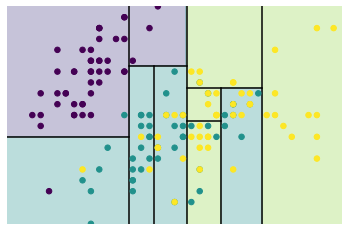

In [ ]:
from sklearn.model_selection import train_test_split

X,y = datasets.load_iris(True)
X = X[:,:-2]
X_train, X_test, y_train, y_test = X[:74,:],X[75:,:],y[:74],y[75:]

clf = tree.DecisionTreeClassifier(min_samples_leaf=5, max_leaf_nodes = 10)
clf.fit(X_train,y_train)

visualize_tree(clf,X,y,xlim=(4,8),ylim=(2,4))

In [ ]:
#Calcul du taux d'erreur sur les données tests
iterat=0
for i in range(len(y_test)):
  if clf.predict(X_test[0:],1)!=y_test:
    iterat=iterat+1

print((iterat/X_test.shape[0])*100)


  




ValueError: ignored

**Exercice**

* Lancez maintenant une régression logistique sur ces données (cherchez dans scikit-learn la meilleure facon de faire).
* Observez les paramètres appris par cet algorithme

In [ ]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train, y_train)
Z = clf.predict(X_test)

for i in range(len(X_test)):
  plt.scatter(X_test[i,0], X_test[i,1], color="C"+str(Z[i]))
  
  
error = Z-y_test
error[error!=0] = 1
error = np.sum(error)/len(error)
print("Taux d'erreur sur les données tests : " + str(error))